In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [53]:
# Đọc file CSV mà không set index_col
matches = pd.read_csv("../matches_2020_2024.csv")

# Kiểm tra tên các cột
print("Các cột trong DataFrame:")
print(matches.columns.tolist())

Các cột trong DataFrame:
['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation', 'opp formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'season', 'team']


In [54]:
# Xử lý dữ liệu
matches = matches.fillna(0)

# Xóa các cột không cần thiết
if "comp" in matches.columns:
    del matches["comp"]
if "notes" in matches.columns:
    del matches["notes"]

# Chuyển đổi cột date sang datetime
matches["date"] = pd.to_datetime(matches["date"])

# Tạo cột target từ kết quả
matches["target"] = (matches["result"] == "W").astype("int")

In [55]:
# Tạo các cột mã hóa
matches["venue_code"] = matches["venue"].astype("category").cat.codes
matches["opp_code"] = matches["opponent"].astype("category").cat.codes

# Xử lý cột time và tạo cột hour
matches["hour"] = matches["time"].str.replace(r":\d+", "", regex=True).astype("int")

# Tạo cột day_code từ date
matches["day_code"] = matches["date"].dt.dayofweek

In [56]:
data = matches

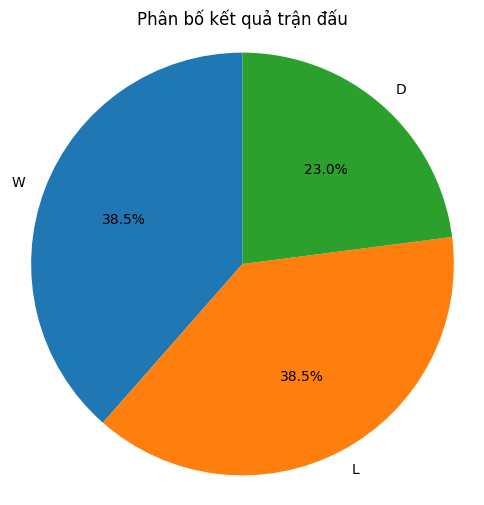

In [57]:
result_counts = data['result'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Phân bố kết quả trận đấu')
plt.axis('equal')
plt.show()

In [58]:
# Lấy mẫu ngẫu nhiên 500 hàng từ tập dữ liệu
sample_df = data.sample(n=500)

# Tính toán thống kê tổng quan của dữ liệu
summary_stats = data.describe()

In [59]:
summary_stats

,date,gf,ga,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,season,target,venue_code,opp_code,hour,day_code
count,2500,2500.00000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.0000,2500.000000,2500.000000,2500.000000
mean,2023-03-04 05:36:23.040000,1.48600,1.48600,1.437200,1.437200,50.000400,39372.124800,12.988800,4.348400,17.049840,0.400000,0.107600,0.131200,2022.176000,0.38520,0.5000,11.912800,15.901600,4.539200
min,2021-08-13 00:00:00,0.00000,0.00000,0.000000,0.000000,18.000000,0.000000,1.000000,0.000000,6.800000,0.000000,0.000000,0.000000,2021.000000,0.00000,0.0000,0.000000,12.000000,0.000000
25%,2022-04-16 00:00:00,1.00000,1.00000,0.800000,0.800000,40.000000,27022.000000,9.000000,3.000000,15.100000,0.000000,0.000000,0.000000,2021.000000,0.00000,0.0000,5.000000,15.000000,5.000000
50%,2023-03-04 00:00:00,1.00000,1.00000,1.300000,1.300000,50.000000,36683.000000,12.000000,4.000000,16.900000,0.000000,0.000000,0.000000,2022.000000,0.00000,0.5000,12.000000,15.000000,5.000000
75%,2023-12-24 00:00:00,2.00000,2.00000,1.900000,1.900000,60.000000,53135.000000,16.000000,6.000000,18.800000,1.000000,0.000000,0.000000,2023.000000,1.00000,1.0000,18.250000,17.000000,6.000000
max,2024-11-10 00:00:00,9.00000,9.00000,7.000000,7.000000,82.000000,75546.000000,36.000000,16.000000,39.900000,4.000000,2.000000,2.000000,2024.000000,1.00000,1.0000,25.000000,20.000000,6.000000
std,NaN,1.30418,1.30418,0.845206,0.845206,12.810201,16829.576941,5.678659,2.509649,2.899567,0.629411,0.327514,0.359497,0.964052,0.48674,0.5001,7.800098,2.290418,1.675227


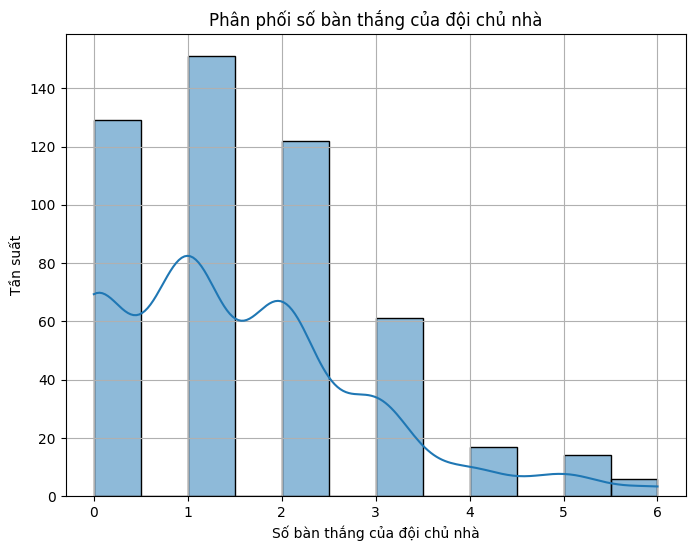

In [60]:
# Trực quan hóa phân phối của số bàn thắng của đội chủ nhà
plt.figure(figsize=(8, 6))
sns.histplot(sample_df['gf'], kde=True)
plt.xlabel('Số bàn thắng của đội chủ nhà')
plt.ylabel('Tần suất')
plt.title('Phân phối số bàn thắng của đội chủ nhà')
plt.grid(True)
plt.show()

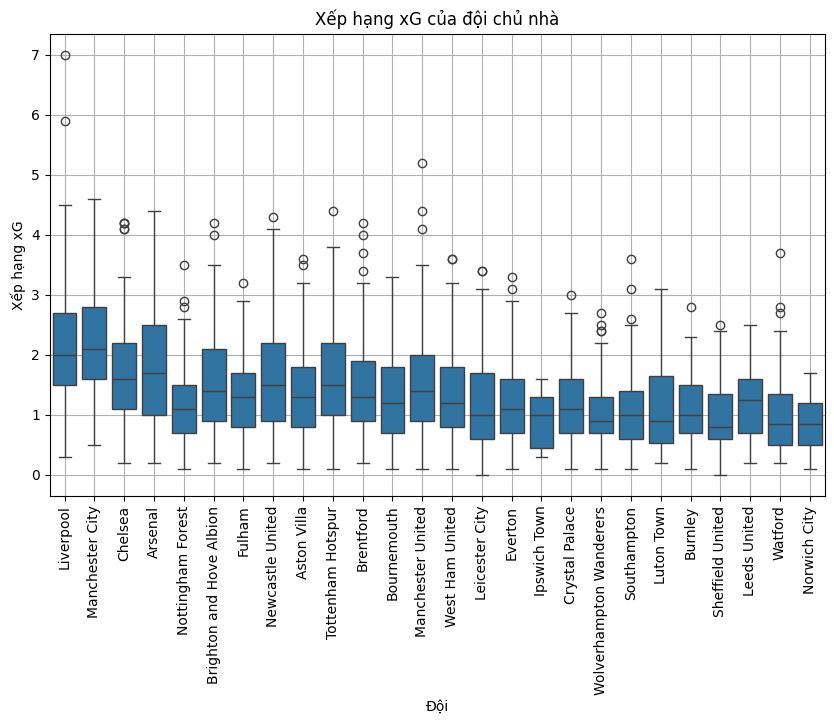

In [61]:
# Trực quan hóa biểu đồ boxplot cho xếp hạng xG của đội chủ nhà theo giải đấu
plt.figure(figsize=(10, 6))
sns.boxplot(data, x='team', y='xg')
plt.xlabel('Đội')
plt.ylabel('Xếp hạng xG')
plt.title('Xếp hạng xG của đội chủ nhà')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

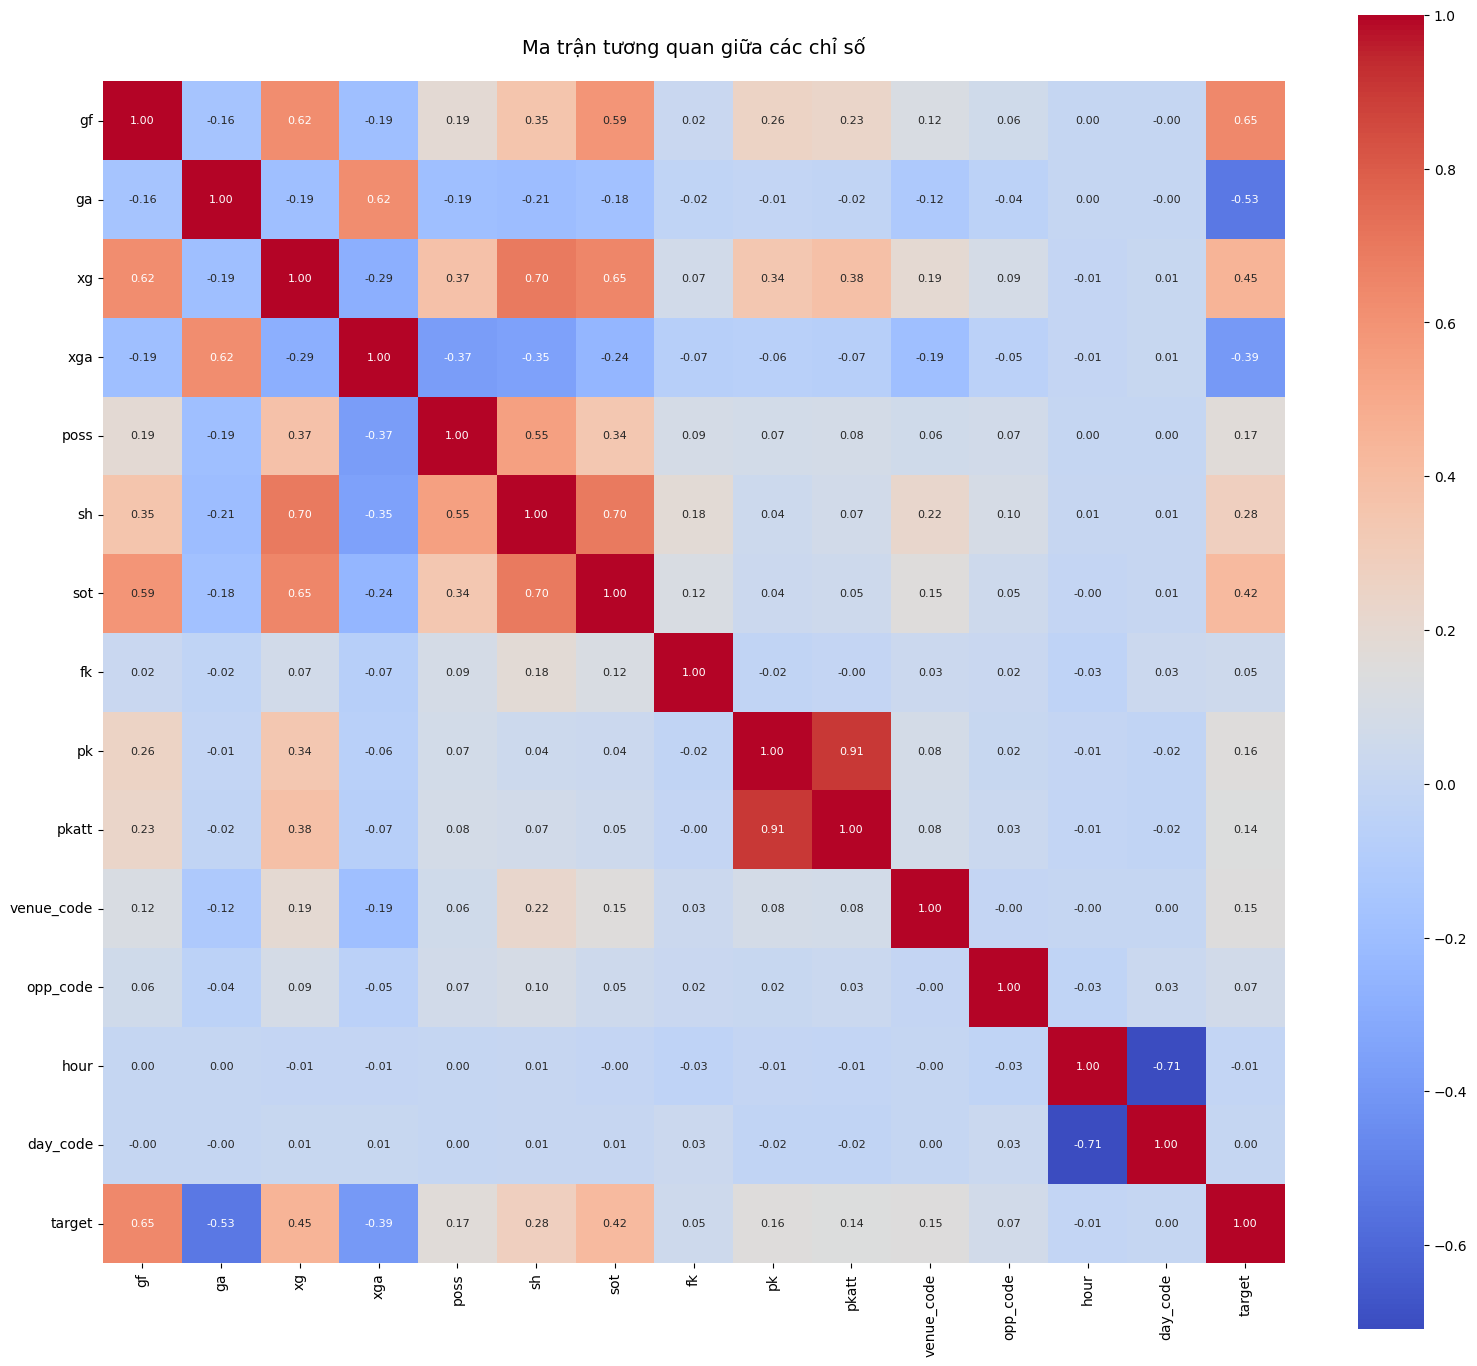


Các tương quan mạnh:
gf - xg: 0.62
gf - sot: 0.59
gf - target: 0.65
ga - xga: 0.62
ga - target: -0.53
poss - sh: 0.55
sh - xg: 0.70
sh - sot: 0.70
sot - xg: 0.65
pk - pkatt: 0.91
day_code - hour: -0.71


In [78]:
# Sử dụng biểu đồ heatmap để hiển thị ma trận tương quan giữa các biến
# Chọn các cột số để tính toán tương quan
numeric_columns = ['gf', 'ga', 'xg', 'xga', 'poss', 'sh', 'sot', 'fk', 'pk', 'pkatt', 
                  'venue_code', 'opp_code', 'hour', 'day_code', 'target']

# Tính ma trận tương quan
corr_matrix = data[numeric_columns].corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            annot_kws={"size": 8},
            square=True)

plt.title('Ma trận tương quan giữa các chỉ số', pad=20, fontsize=14)
plt.tight_layout()
plt.show()

# In ra các tương quan mạnh (>0.5 hoặc <-0.5)
print("\nCác tương quan mạnh:")
for i in numeric_columns:
    for j in numeric_columns:
        if i < j:  # Tránh in trùng lặp
            corr = corr_matrix.loc[i, j]
            if abs(corr) > 0.5:
                print(f"{i} - {j}: {corr:.2f}")

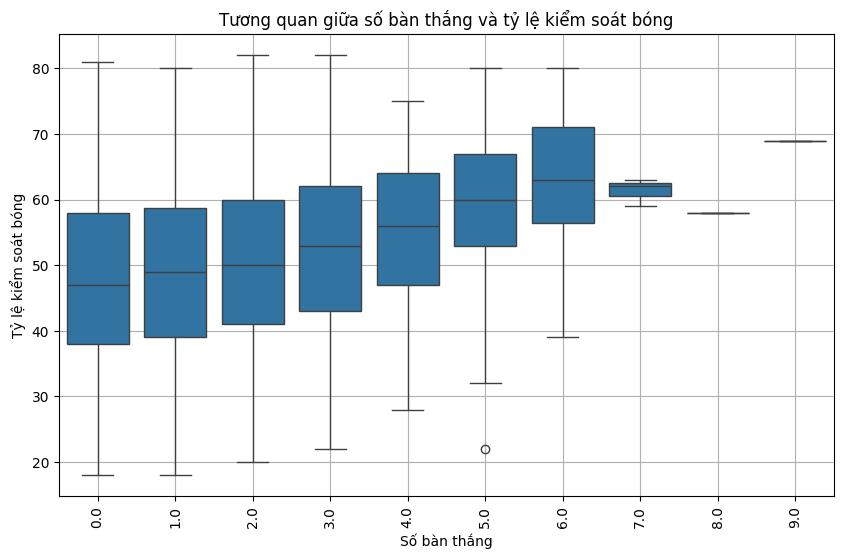

In [63]:
# Tạo biểu đồ barplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=matches, x='gf', y='poss')

# Thiết lập tiêu đề và nhãn trục
plt.xlabel('Số bàn thắng')
plt.ylabel('Tỷ lệ kiểm soát bóng')
plt.title('Tương quan giữa số bàn thắng và tỷ lệ kiểm soát bóng')

plt.xticks(rotation=90)
plt.grid(True)
plt.show()

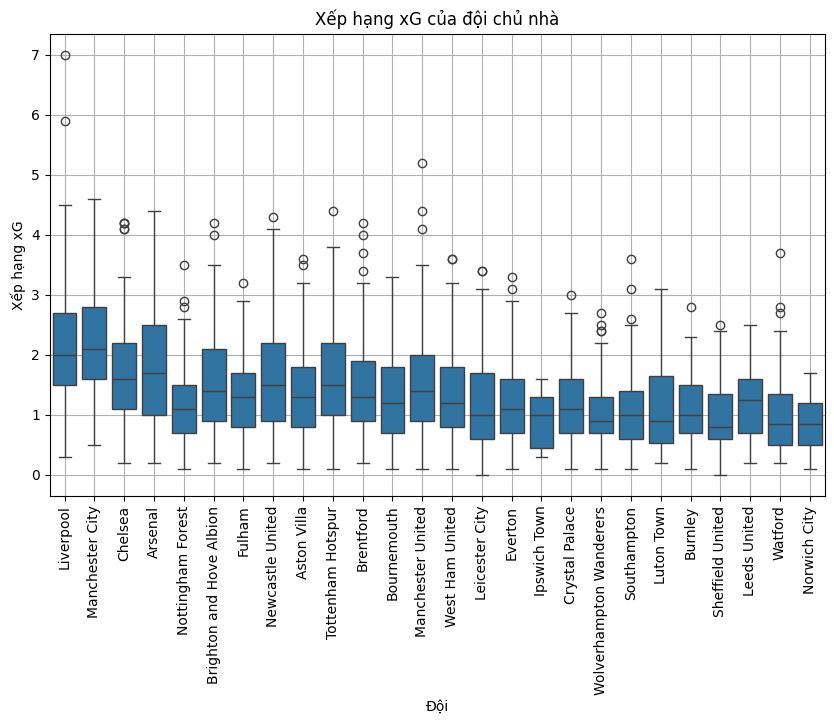

In [64]:
# Trực quan hóa biểu đồ boxplot cho xếp hạng xG của đội chủ nhà theo giải đấu
plt.figure(figsize=(10, 6))
sns.boxplot(data=matches, x='team', y='xg')
plt.xlabel('Đội')
plt.ylabel('Xếp hạng xG')
plt.title('Xếp hạng xG của đội chủ nhà')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

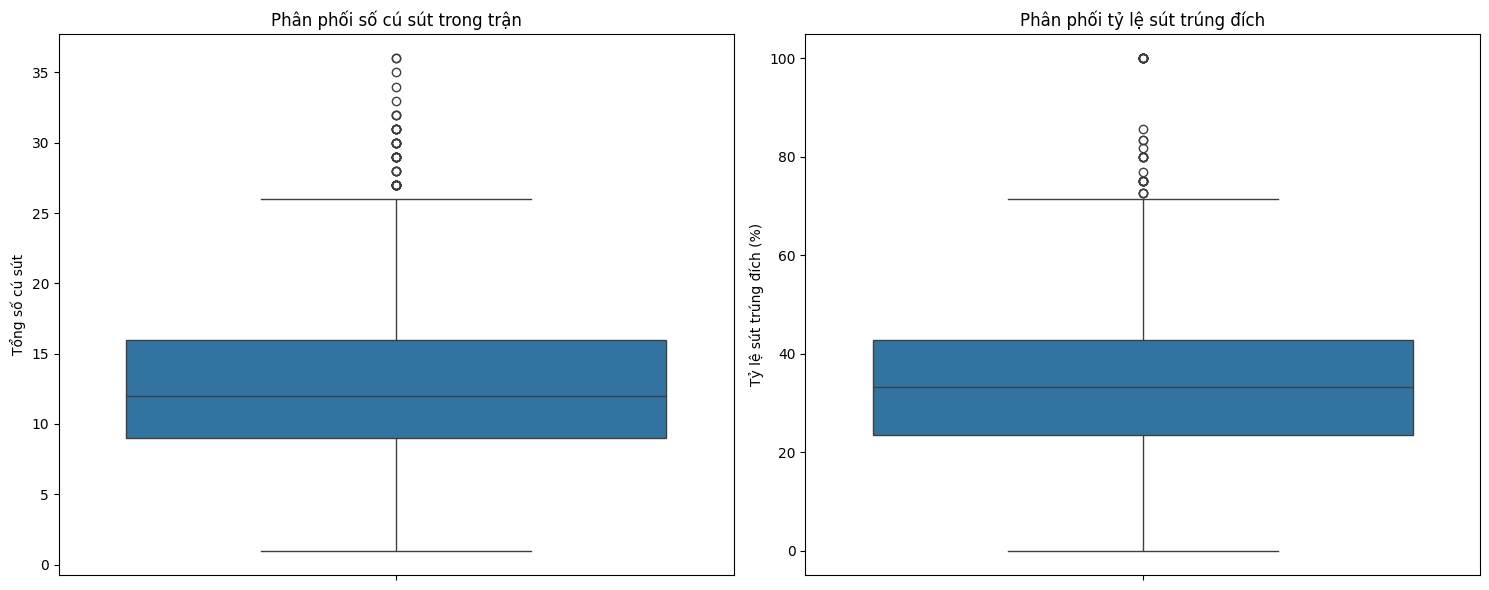

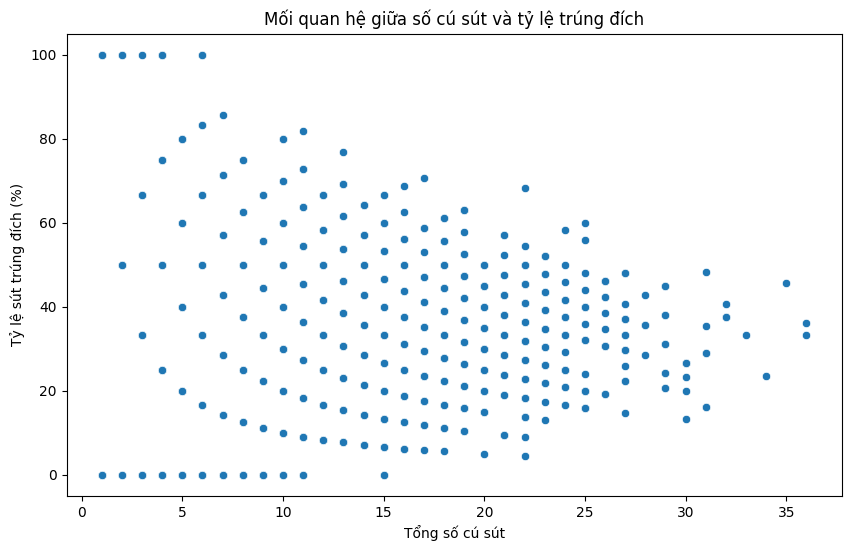


Thống kê về tỷ lệ sút:
                sh          sot  shot_accuracy
count  2500.000000  2500.000000    2500.000000
mean     12.988800     4.348400      34.123376
std       5.678659     2.509649      15.702450
min       1.000000     0.000000       0.000000
25%       9.000000     3.000000      23.529412
50%      12.000000     4.000000      33.333333
75%      16.000000     6.000000      42.857143
max      36.000000    16.000000     100.000000


In [77]:
# Tạo cột tỷ lệ sút trúng đích
data['shot_accuracy'] = (data['sot'] / data['sh'] * 100).fillna(0)

# Tạo biểu đồ phân tích số cú sút và tỷ lệ trúng đích
plt.figure(figsize=(15, 6))

# Subplot 1: Biểu đồ hộp cho số cú sút
plt.subplot(1, 2, 1)
sns.boxplot(data=data, y='sh')
plt.title('Phân phối số cú sút trong trận')
plt.ylabel('Tổng số cú sút')

# Subplot 2: Biểu đồ hộp cho tỷ lệ sút trúng đích
plt.subplot(1, 2, 2)
sns.boxplot(data=data, y='shot_accuracy')
plt.title('Phân phối tỷ lệ sút trúng đích')
plt.ylabel('Tỷ lệ sút trúng đích (%)')

plt.tight_layout()
plt.show()

# Tạo biểu đồ phân tán để xem mối quan hệ
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='sh', y='shot_accuracy')
plt.title('Mối quan hệ giữa số cú sút và tỷ lệ trúng đích')
plt.xlabel('Tổng số cú sút')
plt.ylabel('Tỷ lệ sút trúng đích (%)')
plt.show()

# In thống kê về tỷ lệ sút
print("\nThống kê về tỷ lệ sút:")
print(data[['sh', 'sot', 'shot_accuracy']].describe())

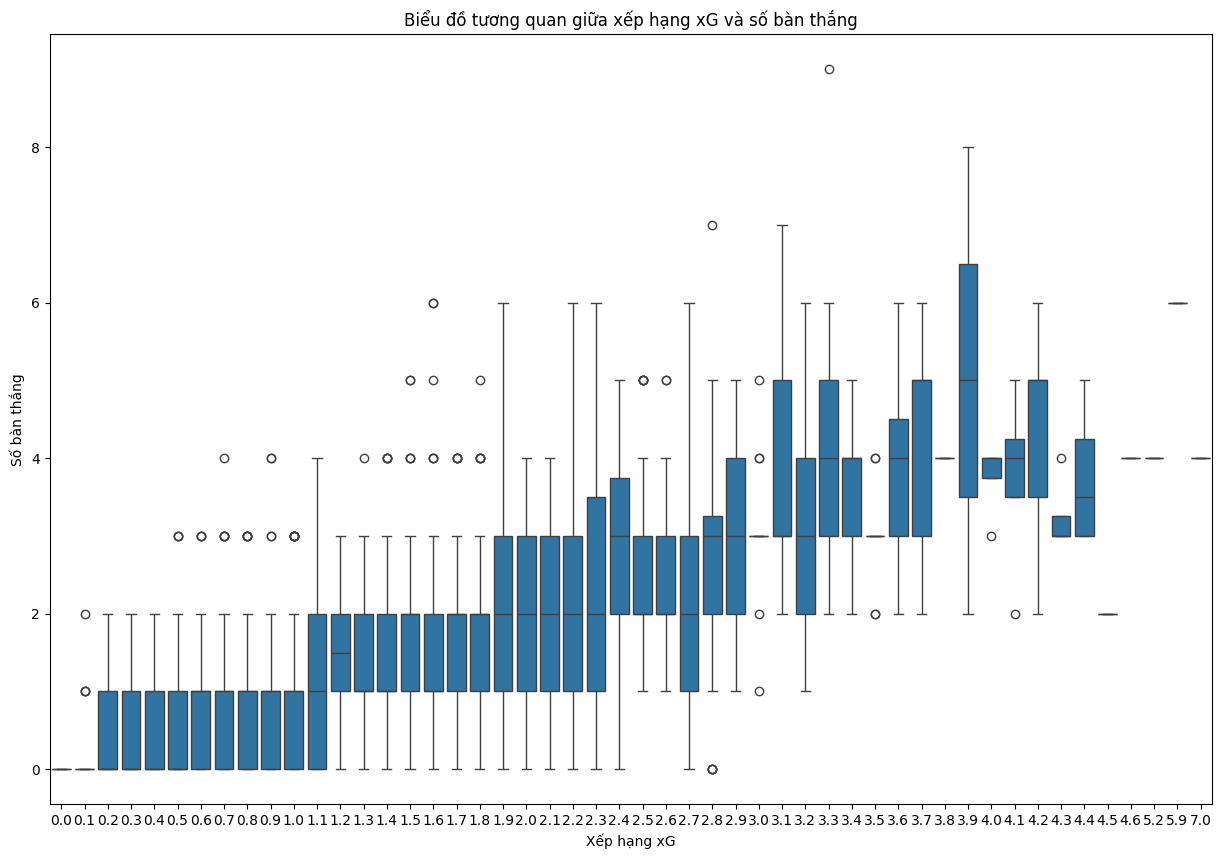

In [66]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x='xg', y='gf')

# Thiết lập tiêu đề và nhãn trục
plt.xlabel('Xếp hạng xG')
plt.ylabel('Số bàn thắng')
plt.title('Biểu đồ tương quan giữa xếp hạng xG và số bàn thắng')

# Hiển thị biểu đồ
plt.show()

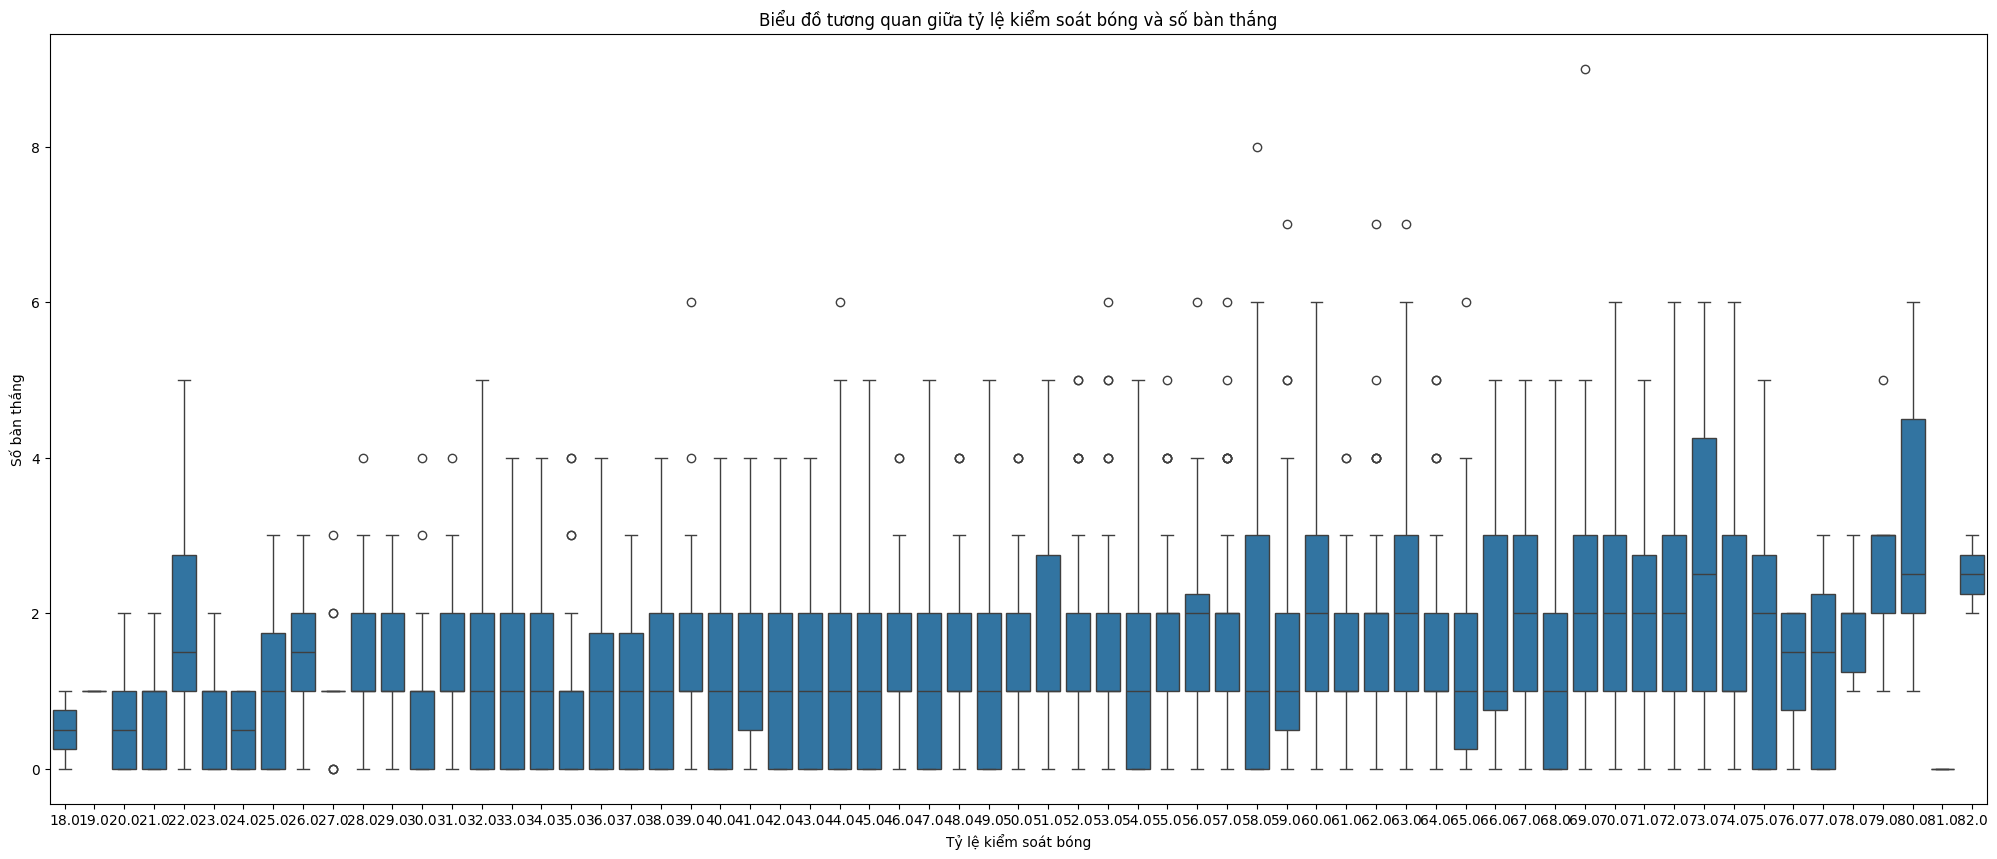

In [67]:
plt.figure(figsize=(25, 10))
sns.boxplot(data=data, x='poss', y='gf')

# Thiết lập tiêu đề và nhãn trục
plt.xlabel('Tỷ lệ kiểm soát bóng')
plt.ylabel('Số bàn thắng')
plt.title('Biểu đồ tương quan giữa tỷ lệ kiểm soát bóng và số bàn thắng')

# Hiển thị biểu đồ
plt.show()

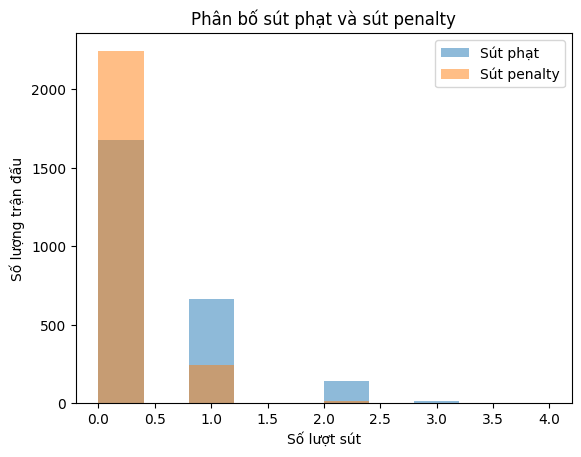

In [68]:
data[['fk', 'pk']].plot.hist(alpha=0.5, bins=10)
plt.xlabel('Số lượt sút')
plt.ylabel('Số lượng trận đấu')
plt.title('Phân bố sút phạt và sút penalty')
plt.legend(['Sút phạt', 'Sút penalty'])
plt.show()

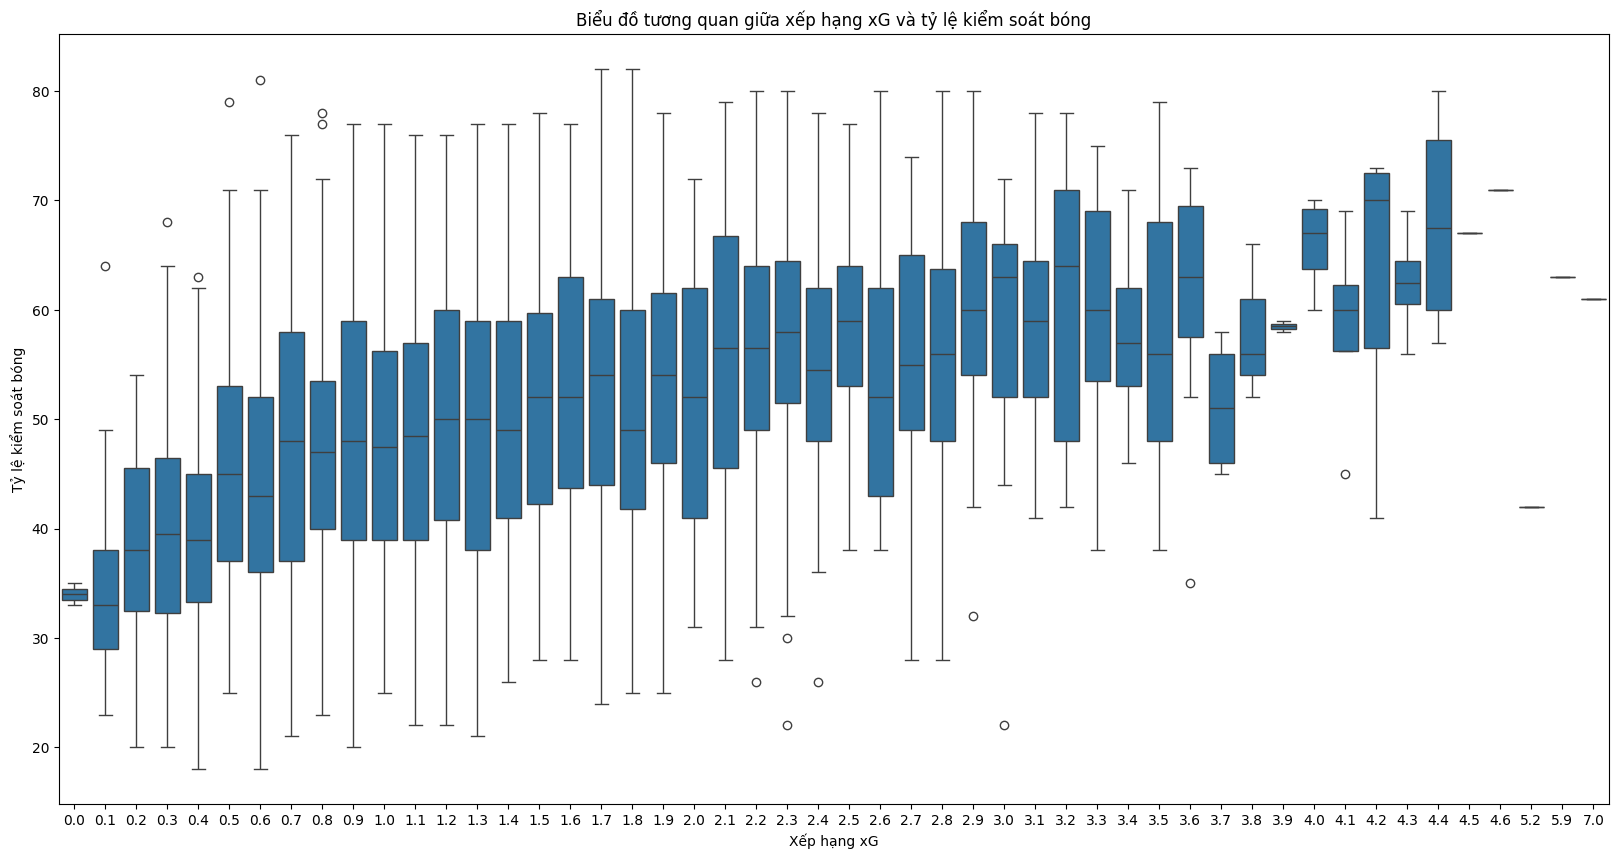

In [69]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data, x='xg', y='poss')

# Thiết lập tiêu đề và nhãn trục
plt.xlabel('Xếp hạng xG')
plt.ylabel('Tỷ lệ kiểm soát bóng')
plt.title('Biểu đồ tương quan giữa xếp hạng xG và tỷ lệ kiểm soát bóng')

# Hiển thị biểu đồ
plt.show()

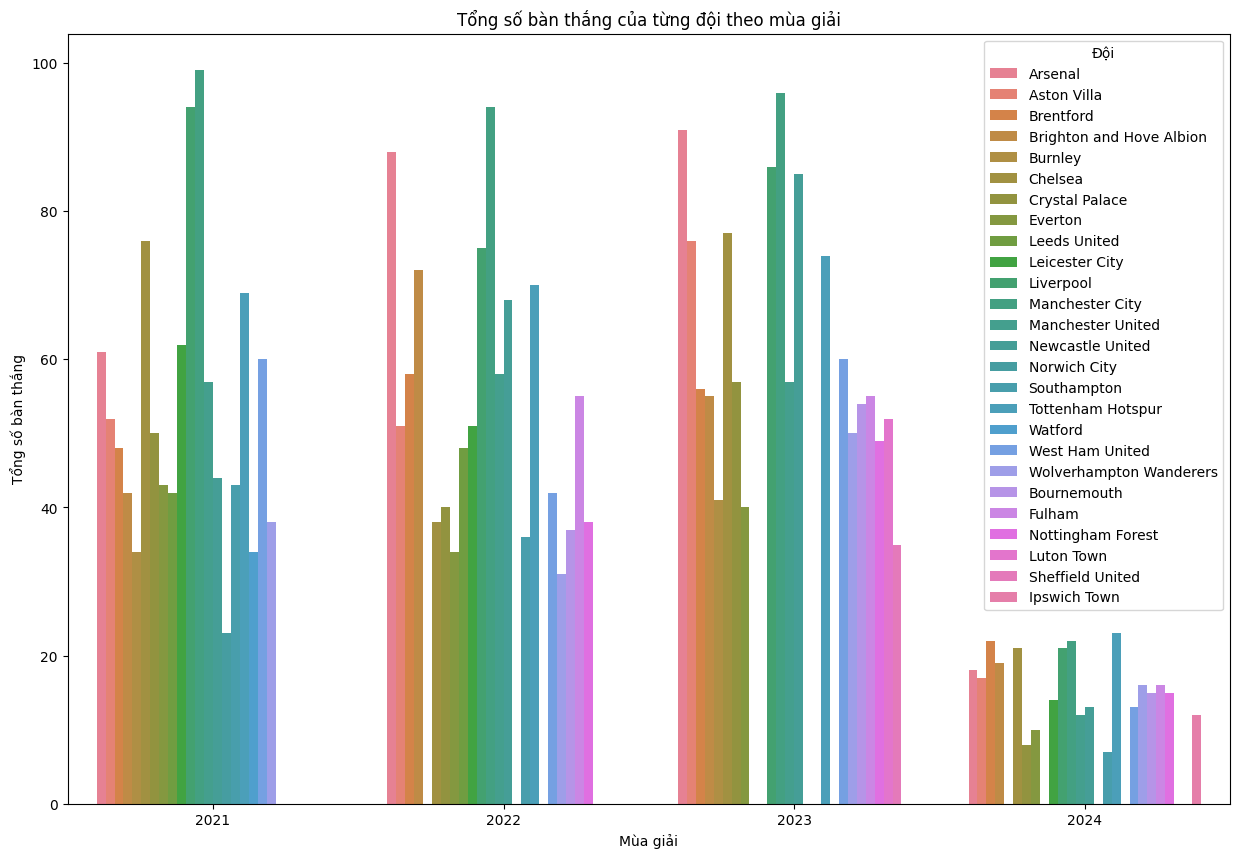

In [70]:
# Tính tổng số bàn thắng của từng đội theo mùa giải
goals_by_team = data.groupby(['season', 'team'])['gf'].sum().reset_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(15, 10))
sns.barplot(data=goals_by_team, x='season', y='gf', hue='team')

# Thiết lập tiêu đề và nhãn trục
plt.xlabel('Mùa giải')
plt.ylabel('Tổng số bàn thắng')
plt.title('Tổng số bàn thắng của từng đội theo mùa giải')

# Hiển thị biểu đồ
plt.legend(title='Đội')
plt.show()

In [71]:
matches

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,fk,pk,pkatt,season,team,target,venue_code,opp_code,hour,day_code
0,2024-08-17,12:30,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,2.6,...,0.0,0,0,2024,Liverpool,1,0,10,12,5
1,2024-08-25,16:30,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,2.5,...,1.0,0,0,2024,Liverpool,1,1,3,16,6
2,2024-09-01,16:00,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,1.8,...,0.0,0,0,2024,Liverpool,1,0,16,16,6
3,2024-09-14,15:00,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,0.9,...,0.0,0,0,2024,Liverpool,0,1,19,15,5
4,2024-09-21,15:00,Matchweek 5,Sat,Home,W,3.0,0.0,Bournemouth,2.0,...,0.0,0,0,2024,Liverpool,1,1,2,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2022-04-30,15:00,Matchweek 35,Sat,Away,L,0.0,2.0,Aston Villa,0.5,...,0.0,0,0,2021,Norwich City,0,0,1,15,5
2496,2022-05-08,14:00,Matchweek 36,Sun,Home,L,0.0,4.0,West Ham,0.8,...,1.0,0,0,2021,Norwich City,0,1,24,14,6
2497,2022-05-11,19:45,Matchweek 21,Wed,Away,L,0.0,3.0,Leicester City,1.1,...,0.0,0,0,2021,Norwich City,0,0,12,19,2
2498,2022-05-15,14:00,Matchweek 37,Sun,Away,D,1.0,1.0,Wolves,1.1,...,0.0,0,0,2021,Norwich City,0,0,25,14,6


In [72]:
matches.info

<bound method DataFrame.info of            date   time         round  day venue result   gf   ga  \
0    2024-08-17  12:30   Matchweek 1  Sat  Away      W  2.0  0.0   
1    2024-08-25  16:30   Matchweek 2  Sun  Home      W  2.0  0.0   
2    2024-09-01  16:00   Matchweek 3  Sun  Away      W  3.0  0.0   
3    2024-09-14  15:00   Matchweek 4  Sat  Home      L  0.0  1.0   
4    2024-09-21  15:00   Matchweek 5  Sat  Home      W  3.0  0.0   
...         ...    ...           ...  ...   ...    ...  ...  ...   
2495 2022-04-30  15:00  Matchweek 35  Sat  Away      L  0.0  2.0   
2496 2022-05-08  14:00  Matchweek 36  Sun  Home      L  0.0  4.0   
2497 2022-05-11  19:45  Matchweek 21  Wed  Away      L  0.0  3.0   
2498 2022-05-15  14:00  Matchweek 37  Sun  Away      D  1.0  1.0   
2499 2022-05-22  16:00  Matchweek 38  Sun  Home      L  0.0  5.0   

             opponent   xg  ...   fk  pk  pkatt season          team target  \
0        Ipswich Town  2.6  ...  0.0   0      0   2024     Liverpool    

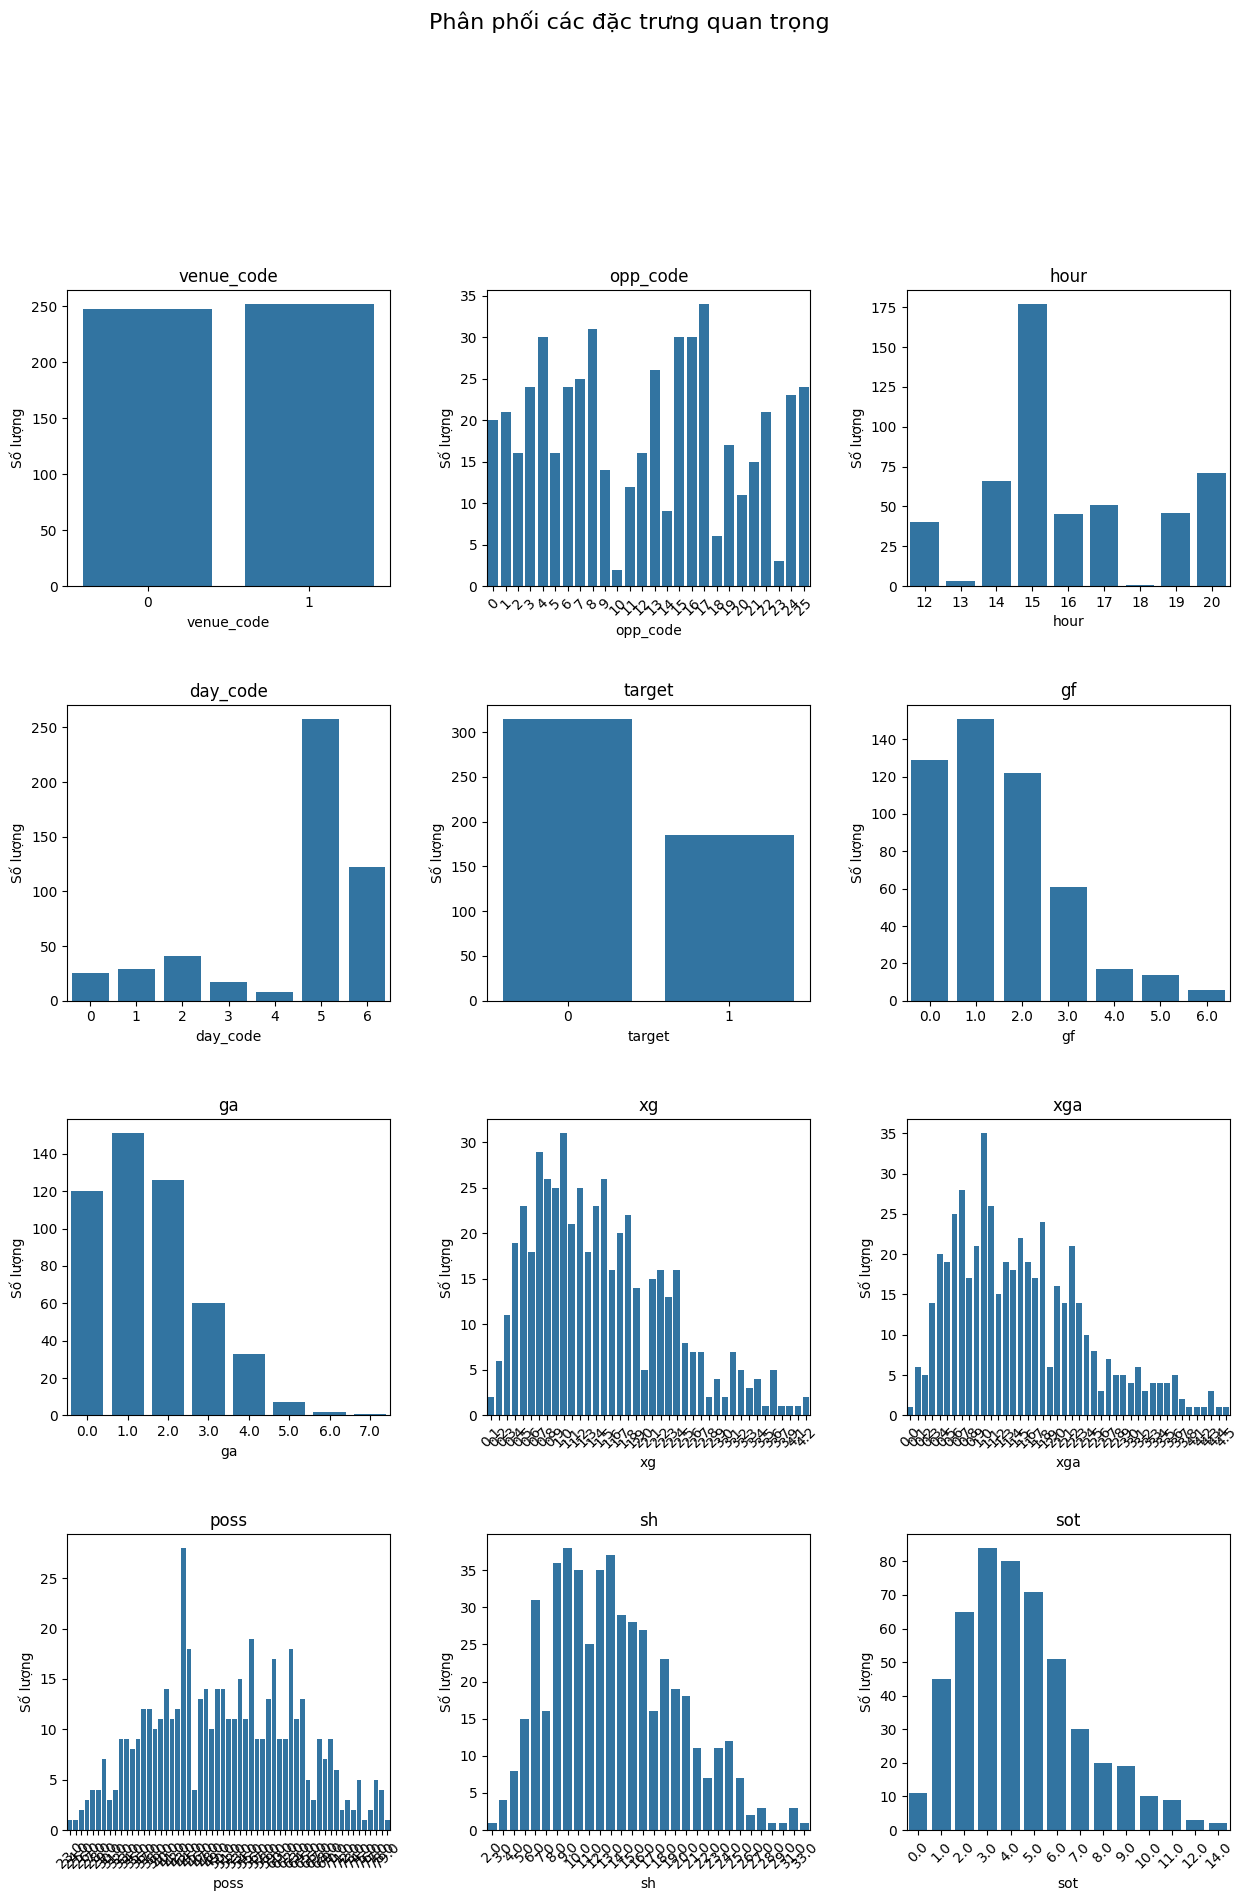

In [80]:
# Tạo subplot
# Chọn các features quan trọng để vẽ biểu đồ
selected_features = ['venue_code', 'opp_code', 'hour', 'day_code', 'target', 
                    'gf', 'ga', 'xg', 'xga', 'poss', 'sh', 'sot']

# Tạo subplot với kích thước phù hợp
fig, axs = plt.subplots(4, 3, figsize=(15, 20))
axs = axs.flatten()  # Làm phẳng mảng để dễ dàng truy cập

# Vẽ biểu đồ cho từng feature
for i, feature in enumerate(selected_features):
    if i < len(axs):  # Đảm bảo không vượt quá số lượng subplot
        sns.countplot(data=sample_df, x=feature, ax=axs[i])
        axs[i].set_title(feature)
        axs[i].set_xlabel(feature)
        axs[i].set_ylabel('Số lượng')
        
        # Xoay nhãn trục x nếu cần
        if len(sample_df[feature].unique()) > 10:
            axs[i].tick_params(axis='x', rotation=45)
        
        # Điều chỉnh kích thước chữ
        axs[i].title.set_fontsize(12)
        axs[i].xaxis.label.set_fontsize(10)
        axs[i].yaxis.label.set_fontsize(10)

# Ẩn subplot thừa nếu có
if len(selected_features) < len(axs):
    for i in range(len(selected_features), len(axs)):
        axs[i].set_visible(False)

# Thêm tiêu đề chính
plt.suptitle('Phân phối các đặc trưng quan trọng', fontsize=16, y=1.02)

# Điều chỉnh khoảng cách giữa các subplot
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Hiển thị biểu đồ
plt.show()